In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
laserData1 = pandas.read_csv("./data/laserVsRunNum_2.csv")
laserData2 = laserData1.loc[laserData1['AverageEnergy'] > 10]
#laserData = laserData2.drop_duplicates(subset='RunNum',keep=False)

In [3]:
print(len(laserData2.index))

29141


In [4]:
print(laserData2['RunNum'][1])
print(laserData2['RunNum'][1000])
print(laserData2['RunNum'][10000])
print(laserData2['RunNum'].iloc[10000])

16437.0
16465.0
16466.0
16454.0


In [5]:
laserData = pandas.DataFrame(columns=['AverageEnergy','RunNum','totalEntries'])

print(len(laserData2.index), "Rows Total")
length = len(laserData2.index)
for i in range(length):
    if (i % 1000 == 0):
        print("    ",i,"Rows Processed")
    runNumi = laserData2['RunNum'].iloc[i]
    dupCount = laserData2['totalEntries'].iloc[i]
    weightedE = laserData2['AverageEnergy'].iloc[i]*laserData2['totalEntries'].iloc[i]
    for j in range(length):
        runNumj = 0#laserData2['RunNum'][j]
        if(runNumj == runNumi):
            weightedE = weightedE + laserData2['AverageEnergy'].iloc[j]*laserData2['totalEntries'].iloc[j]
            dupCount = dupCount + laserData2['totalEntries'].iloc[j]
    trueE = weightedE / dupCount
    ding = pandas.DataFrame([[trueE,runNumi,dupCount]],columns=['AverageEnergy','RunNum','totalEntries'])
    laserData = laserData.append(ding,ignore_index=True)
    
laserData = laserData.drop_duplicates(subset='RunNum')

29141 Rows Total
     0 Rows Processed
     1000 Rows Processed
     2000 Rows Processed
     3000 Rows Processed
     4000 Rows Processed
     5000 Rows Processed
     6000 Rows Processed
     7000 Rows Processed
     8000 Rows Processed
     9000 Rows Processed
     10000 Rows Processed
     11000 Rows Processed
     12000 Rows Processed
     13000 Rows Processed
     14000 Rows Processed
     15000 Rows Processed
     16000 Rows Processed
     17000 Rows Processed
     18000 Rows Processed
     19000 Rows Processed
     20000 Rows Processed
     21000 Rows Processed
     22000 Rows Processed
     23000 Rows Processed
     24000 Rows Processed
     25000 Rows Processed
     26000 Rows Processed
     27000 Rows Processed
     28000 Rows Processed
     29000 Rows Processed


In [6]:
laserData.head()

,AverageEnergy,RunNum,totalEntries
0,88878.598395,16413.0,4080
1,88709.982445,16437.0,6960
2,88374.440865,16442.0,4128
3,88463.935285,16470.0,4080
4,88573.292388,16430.0,4032


In [9]:
laserData = laserData.loc[laserData['AverageEnergy']<1000000000]
laserData.describe()

,AverageEnergy,RunNum
count,129.000000,129.000000
mean,88573.341969,16435.705426
std,397.842051,47.145951
min,87861.799991,16355.000000
25%,88367.456104,16392.000000
50%,88538.318157,16438.000000
75%,88693.021082,16476.000000
max,91662.451072,16514.000000


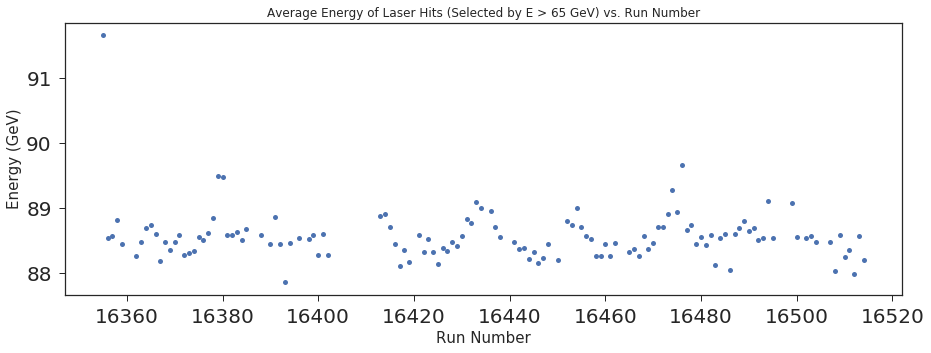

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(laserData['RunNum'],laserData['AverageEnergy']/1000,linestyle='',marker='o',markersize='5')
plt.xlabel("Run Number",size=15)
plt.ylabel("Energy (GeV)",size=15)
plt.title("Average Energy of Laser Hits (Selected by E > 65 GeV) vs. Run Number")
plt.show()

In [16]:
laserDataByCalo1 = pandas.read_csv("./data/laserVsRunNum_calo.csv")
laserDataByCalo2 = laserDataByCalo1.loc[laserDataByCalo1['totalEntries'] > 10]

In [17]:
laserDataByCalo = laserDataByCalo2

In [18]:
laserDataByCalo.describe()

,AverageEnergy,RunNum,totalEntries,caloNum
count,365333.000000,365333.000000,365333.000000,365333.000000
mean,88551.914467,16458.992054,178.474299,12.499399
std,9457.792567,25.147779,31.506835,6.922648
min,70172.730071,16413.000000,12.000000,1.000000
25%,80953.742301,16437.000000,170.000000,6.000000
50%,90014.282297,16462.000000,170.000000,12.000000
75%,92345.543936,16478.000000,172.000000,18.000000
max,892853.815044,16514.000000,572.000000,24.000000


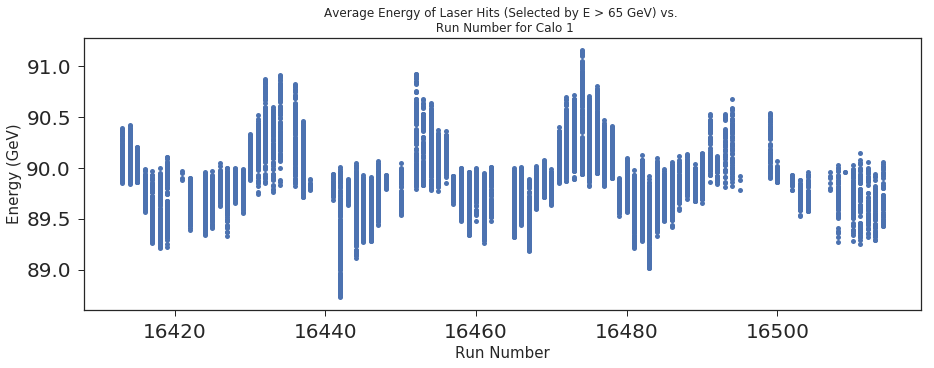

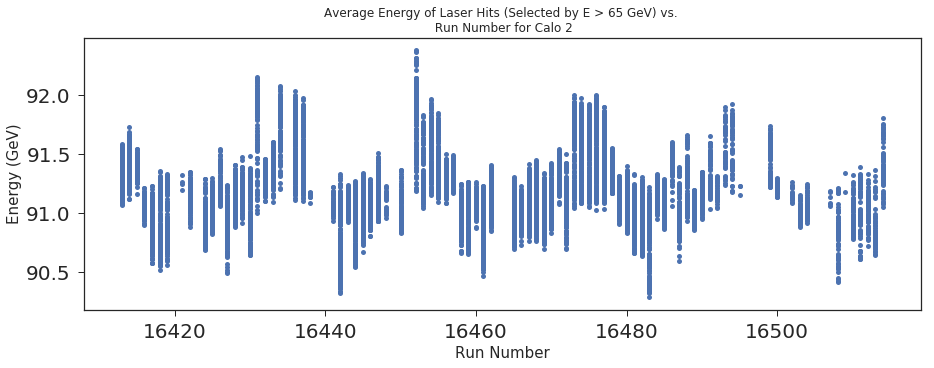

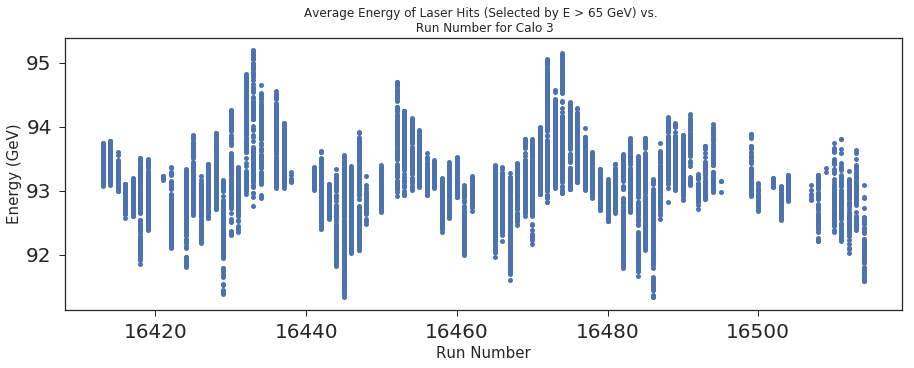

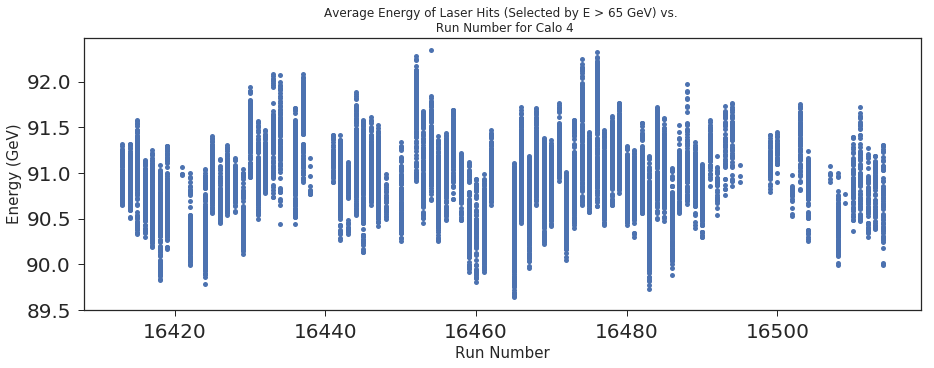

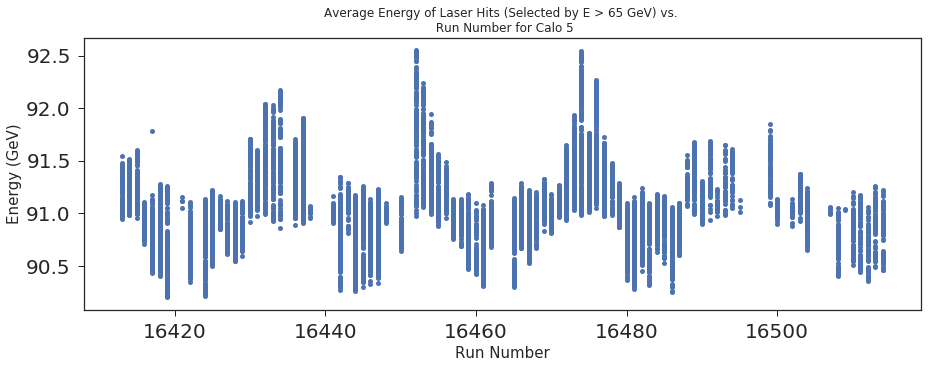

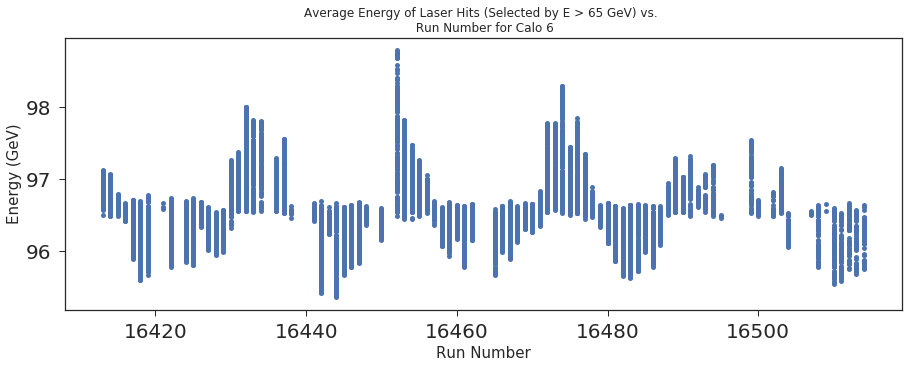

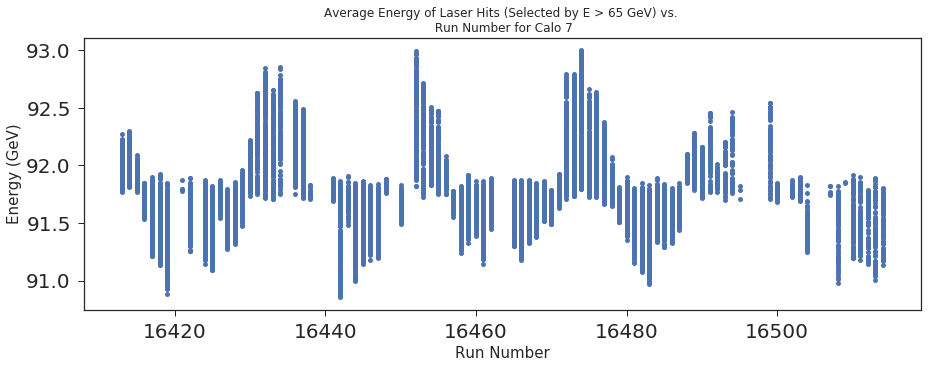

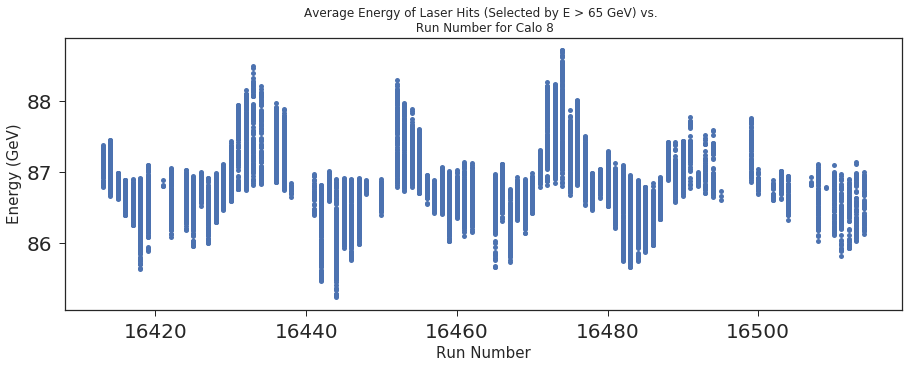

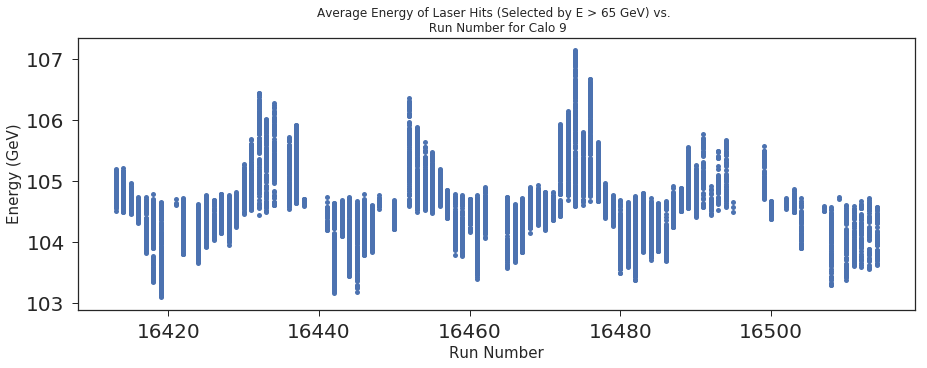

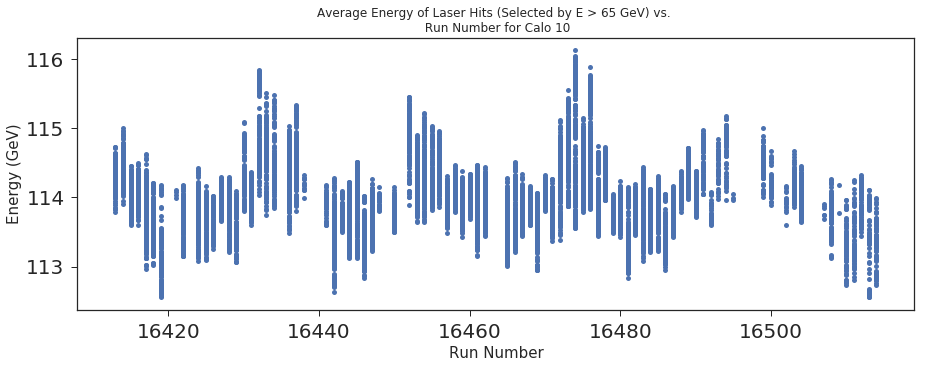

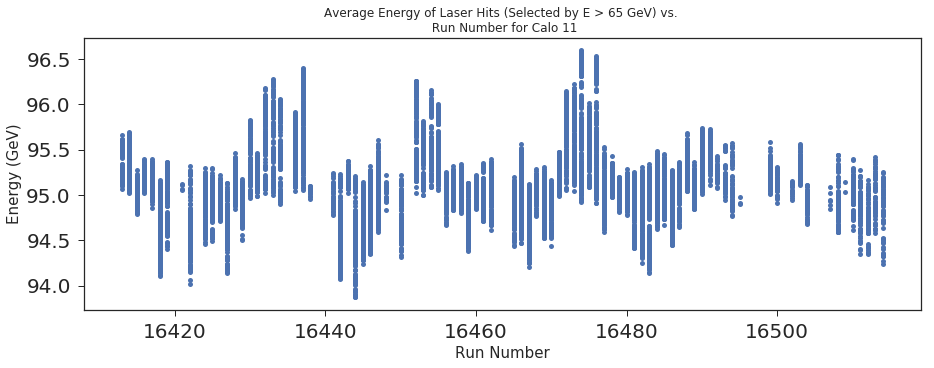

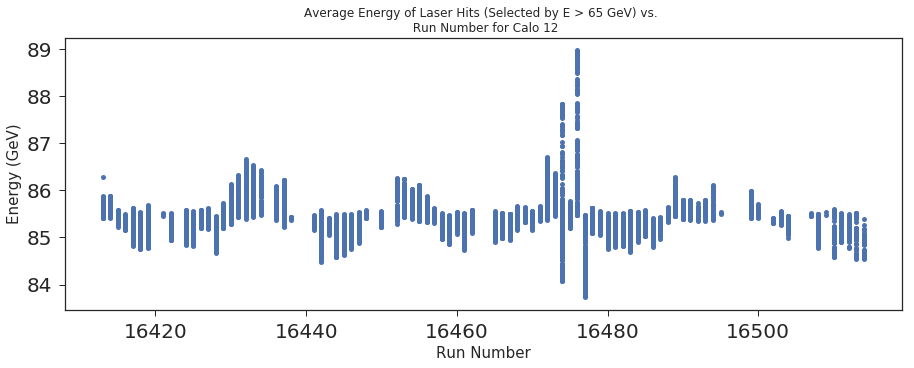

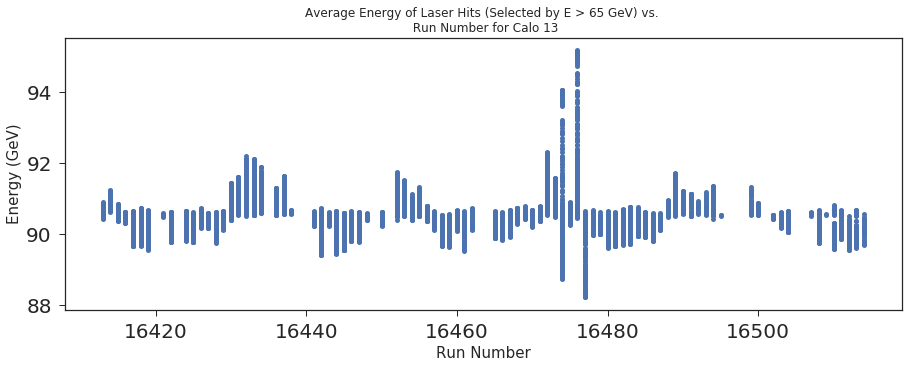

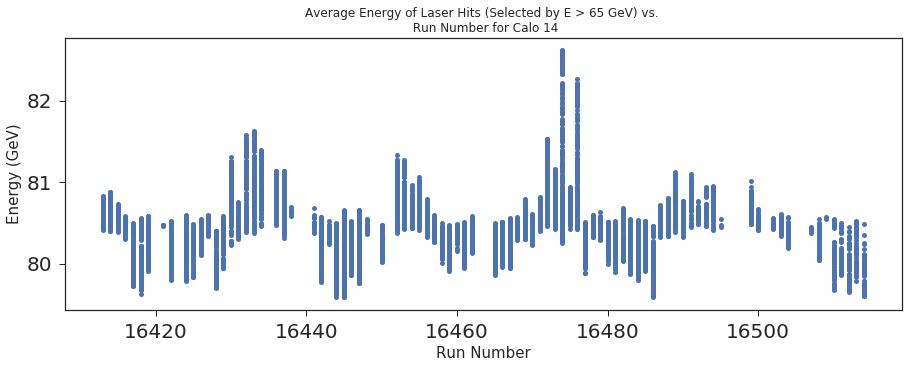

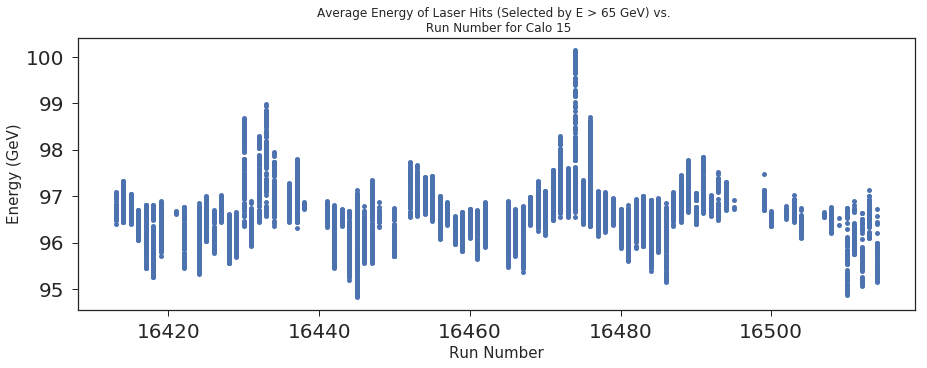

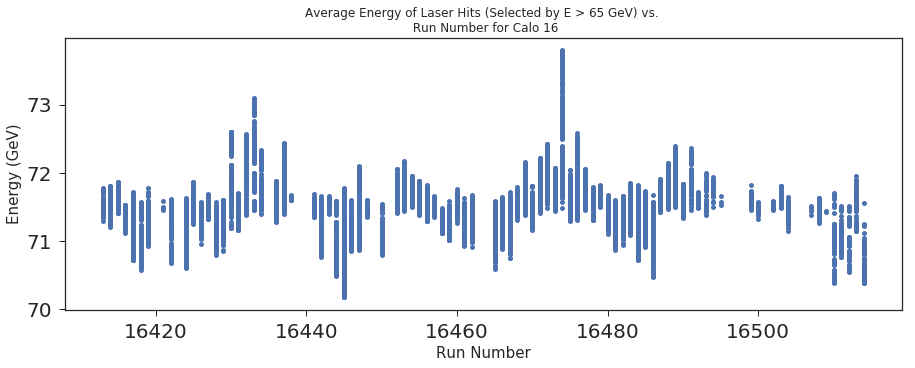

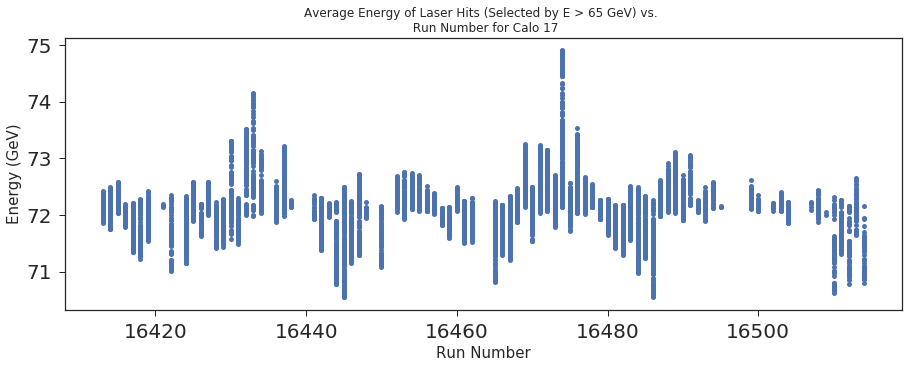

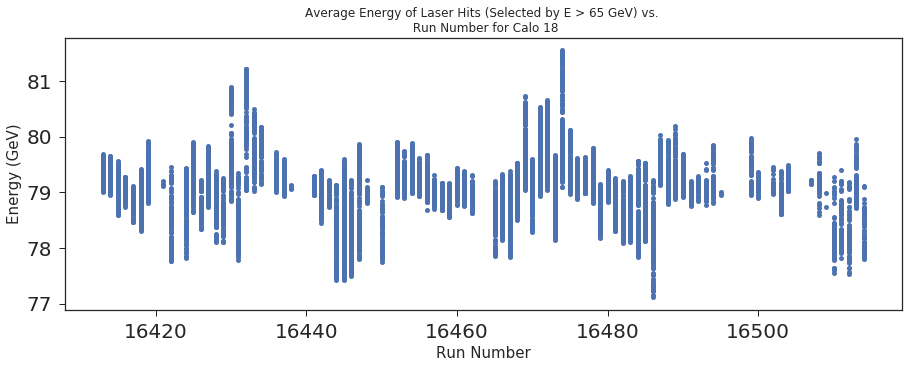

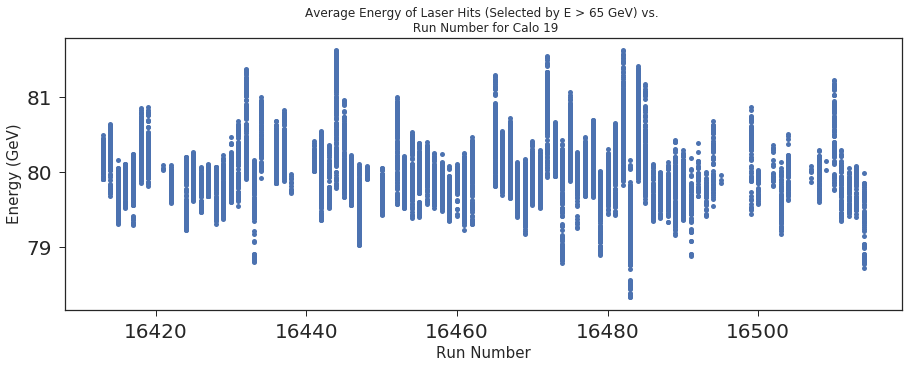

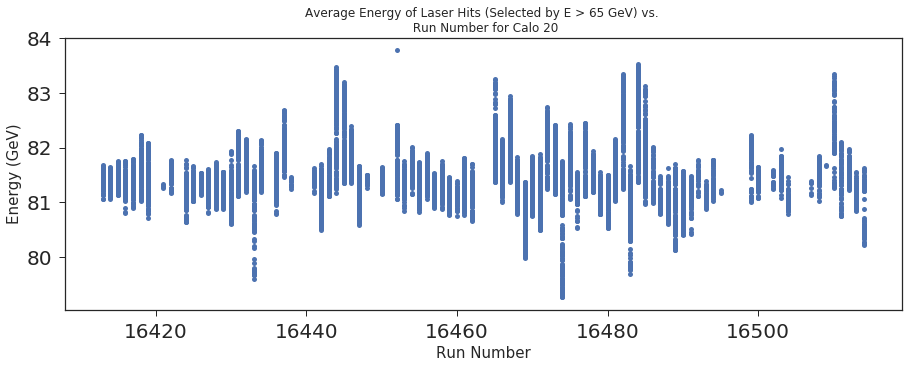

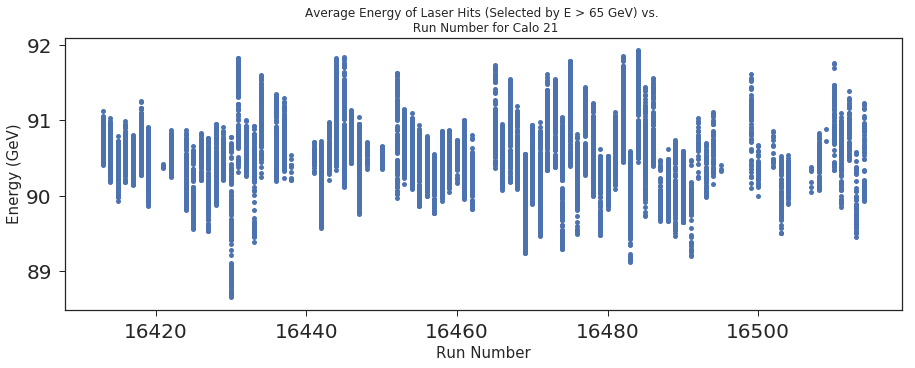

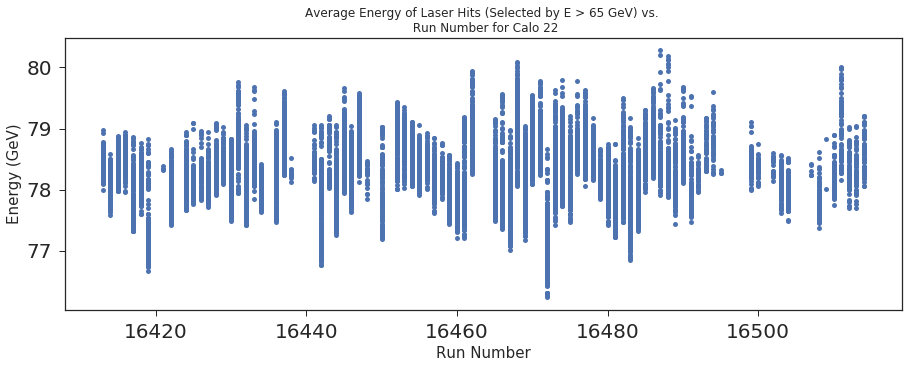

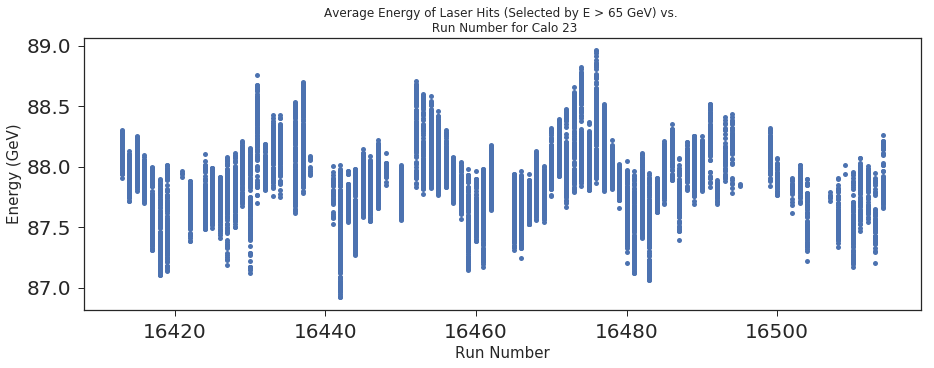

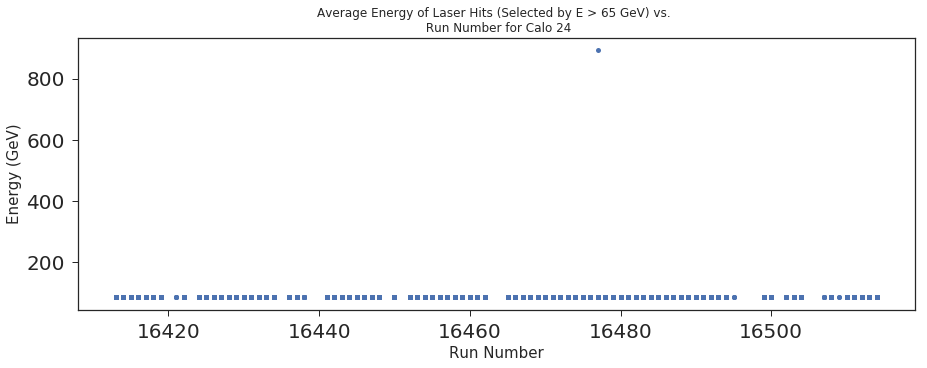

In [20]:
for calo in range(1,25):
    fig, ax = plt.subplots(figsize=(15, 5))
    plt.plot(laserDataByCalo['RunNum'].loc[laserDataByCalo['caloNum'] == calo],(laserDataByCalo['AverageEnergy'].loc[laserDataByCalo['caloNum'] == calo])/1000,linestyle='',marker='o',markersize='5')
    plt.xlabel("Run Number",size=15)
    plt.ylabel("Energy (GeV)",size=15)
    plt.title("Average Energy of Laser Hits (Selected by E > 65 GeV) vs. \n Run Number for Calo "+str(calo))
#    plt.ylim(65,120)
#    plt.savefig("./images/LaserVsRunNum/LaserVsRunNum_calo"+str(calo).zfill(2)+".png")
    plt.show()

In [31]:
#laserDataByCalo1 = pandas.read_csv("./data/laserVsRunNum_calo.csv")
laserDataByCalo1 = pandas.read_csv("./data/laserVsRunNum_calo_gaussian_timecut.csv")
laserDataByCalo2 = laserDataByCalo1.loc[laserDataByCalo1['totalEntries'] > 10]

In [32]:
dfList = list(set(laserDataByCalo2['RunNum'].tolist()))

In [33]:
len(dfList)
dfList.sort()
print(dfList)

[16355.0, 16356.0, 16357.0, 16358.0, 16359.0, 16362.0, 16363.0, 16364.0, 16365.0, 16366.0, 16367.0, 16368.0, 16369.0, 16370.0, 16371.0, 16372.0, 16373.0, 16374.0, 16375.0, 16376.0, 16377.0, 16378.0, 16379.0, 16380.0, 16381.0, 16382.0, 16383.0, 16384.0, 16385.0, 16388.0, 16390.0, 16391.0, 16392.0, 16393.0, 16394.0, 16396.0, 16398.0, 16399.0, 16400.0, 16401.0, 16402.0, 16413.0, 16414.0, 16415.0, 16416.0, 16417.0, 16418.0, 16419.0, 16421.0, 16422.0, 16424.0, 16425.0, 16426.0, 16427.0, 16428.0, 16429.0, 16430.0, 16431.0, 16432.0, 16433.0, 16434.0, 16436.0, 16437.0, 16438.0, 16441.0, 16442.0, 16443.0, 16444.0, 16445.0, 16446.0, 16447.0, 16448.0, 16450.0, 16452.0, 16453.0, 16454.0, 16455.0, 16456.0, 16457.0, 16458.0, 16459.0, 16460.0, 16461.0, 16462.0, 16465.0, 16466.0, 16467.0, 16468.0, 16469.0, 16470.0, 16471.0, 16472.0, 16473.0, 16474.0, 16475.0, 16476.0, 16477.0, 16478.0, 16479.0, 16480.0, 16481.0, 16482.0, 16483.0, 16484.0, 16485.0, 16486.0, 16487.0, 16488.0, 16489.0, 16490.0, 16491.0, 

In [34]:
laserDataByCalo2.head()

,AverageEnergy,RunNum,totalEntries,caloNum,stdev
0,90211.529561,16413.0,85,1,383.063002
1,89950.506787,16437.0,145,1,345.794231
2,89561.193323,16442.0,86,1,388.152512
3,89823.855639,16470.0,85,1,417.446607
4,89987.897585,16430.0,84,1,355.345601


In [35]:
meanVec = []
stdVec = []

for calo in range(1,25):
    print("Calo ",calo)
    meanVeci = []
    stdVeci = []
    for RunNum in dfList:
        tempdf = laserDataByCalo2.loc[(laserDataByCalo2['caloNum']==calo) & (laserDataByCalo2['RunNum']==RunNum)]
        tempdf['ding'] = tempdf['AverageEnergy']*tempdf['totalEntries']
        tempdf['dong'] = tempdf['stdev']*tempdf['totalEntries']
        tempdf['dongdong'] = tempdf['dong']*tempdf['dong']
        meanVeci.append( (tempdf['ding'].sum()/tempdf['totalEntries'].sum(), RunNum,calo))
#        stdVeci.append( (tempdf['ding'].std()/tempdf['totalEntries'].sum(), RunNum,calo))
        stdVeci.append( ( tempdf['stdev'].mean(), RunNum, calo ) )
#        stdVeci.append( ( (tempdf['dong']*tempdf['dong']).sum()/tempdf['totalEntries'].sum(), RunNum,calo ) )
    meanVec.append(meanVeci)
    stdVec.append(stdVeci)
#print(meanVec)

Calo  1


/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Calo  2
Calo  3
Calo  4
Calo  5
Calo  6
Calo  7
Calo  8
Calo  9
Calo  10
Calo  11
Calo  12
Calo  13
Calo  14
Calo  15
Calo  16
Calo  17
Calo  18
Calo  19
Calo  20
Calo  21
Calo  22
Calo  23
Calo  24


In [36]:
tempdf['dongdong'] = tempdf['dong']*tempdf['dong']
print(tempdf)
tempdf['ding'].describe()
print(math.sqrt(tempdf['dongdong'].sum()/tempdf['totalEntries'].sum())/1000)

        AverageEnergy   RunNum  totalEntries  caloNum       stdev  \
11065    87437.448676  16514.0            85       24  361.013235   
49233    87170.965295  16514.0            85       24  292.056153   
59193    86750.414191  16514.0            85       24  354.600293   
64213    87244.132517  16514.0            85       24  382.746243   
64267    86597.759939  16514.0            84       24  339.753638   
64319    86622.650432  16514.0            85       24  379.407515   
64363    87149.109679  16514.0            85       24  297.592910   
64371    87342.163213  16514.0            86       24  339.512315   
68113    86920.617110  16514.0            86       24  399.702248   
75798    87181.172275  16514.0            86       24  335.251704   
81468    87327.025653  16514.0            85       24  309.225521   
90557    86683.121884  16514.0            86       24  334.805718   
100909   86652.490826  16514.0            86       24  339.483299   
101016   87119.249270  16514.0    

/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


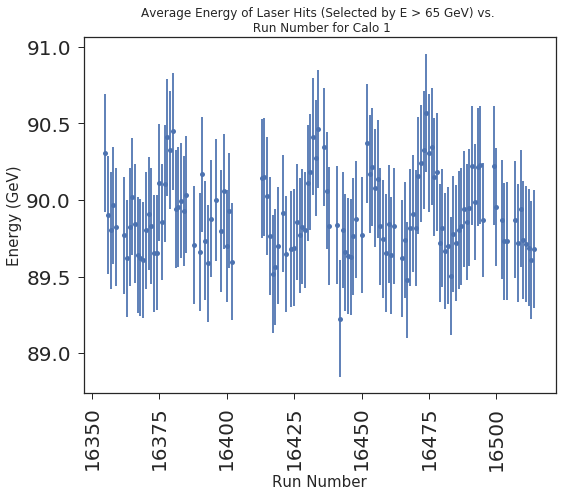

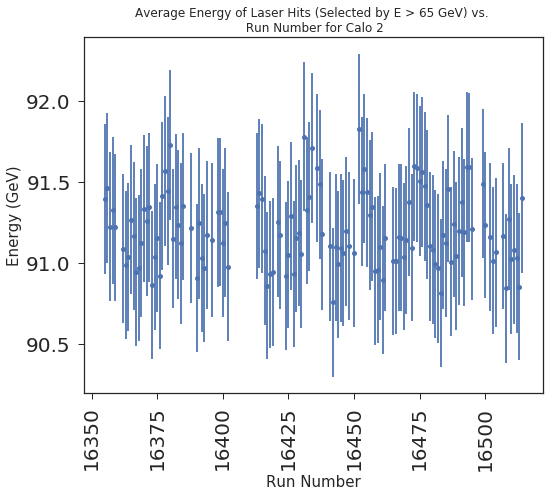

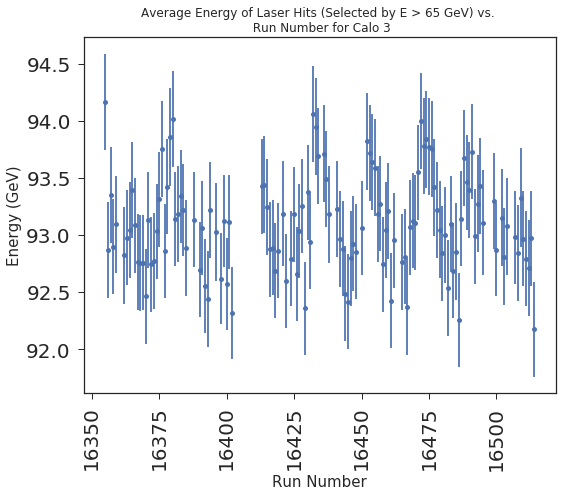

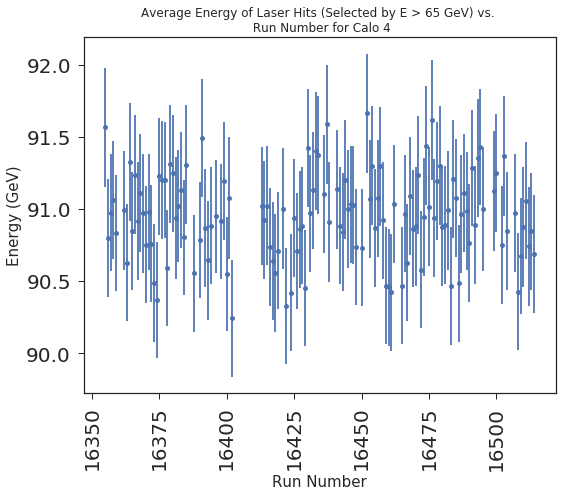

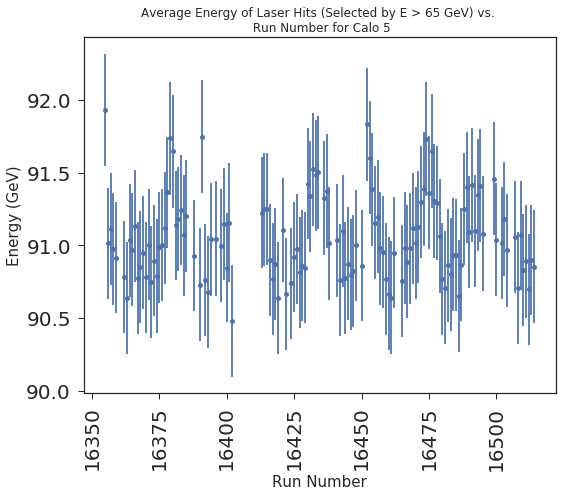

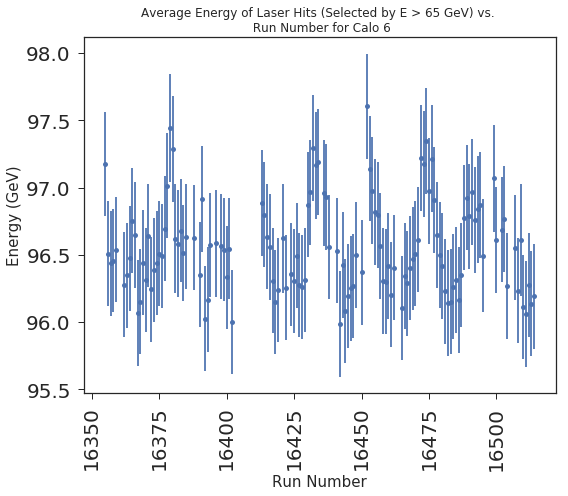

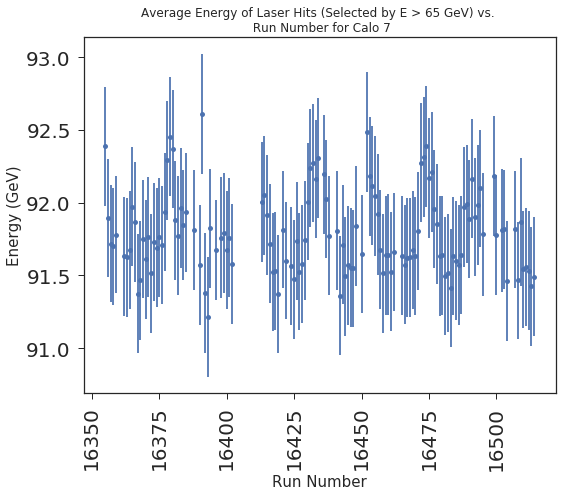

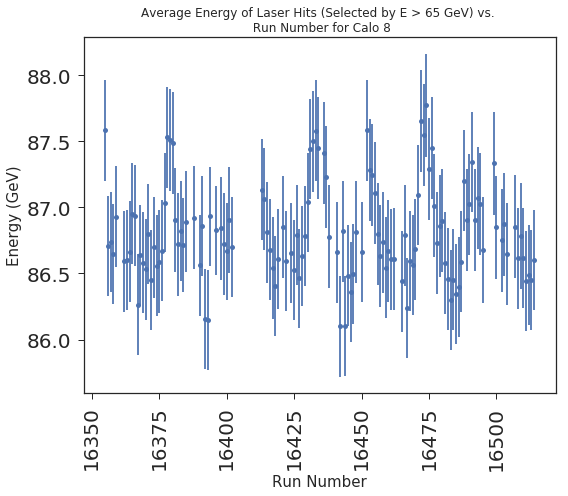

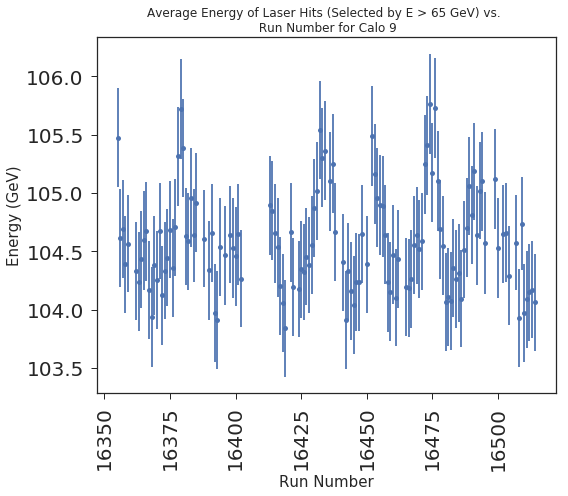

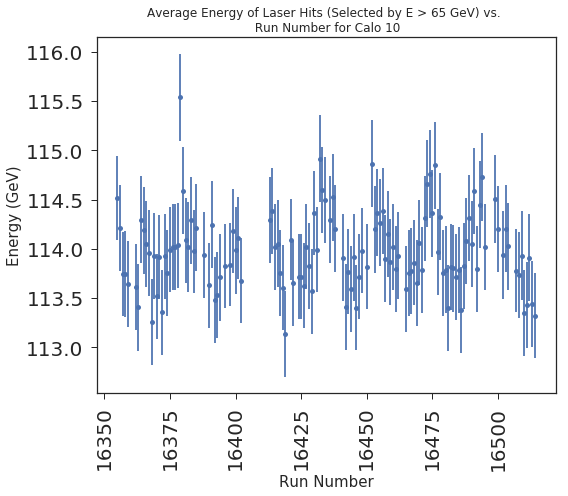

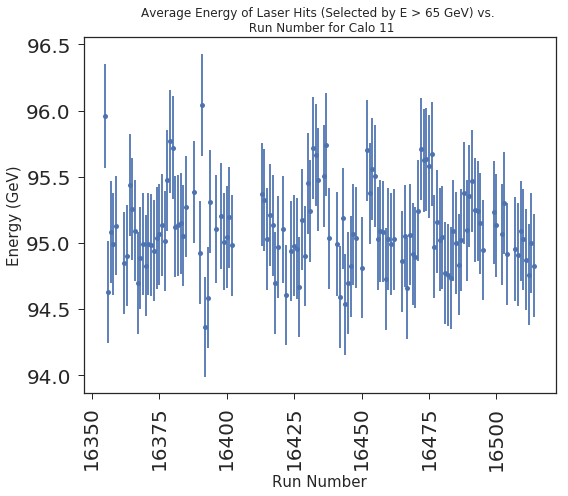

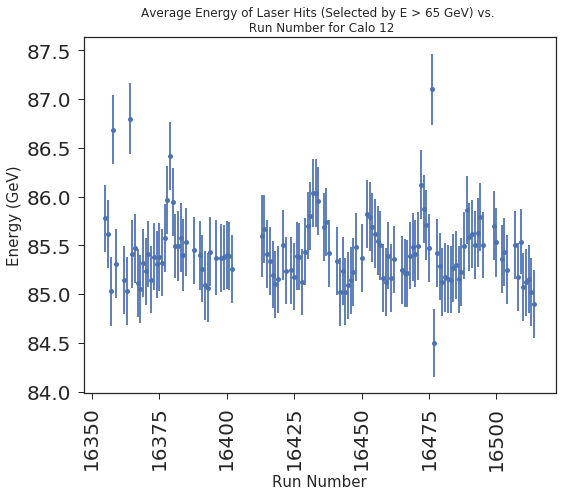

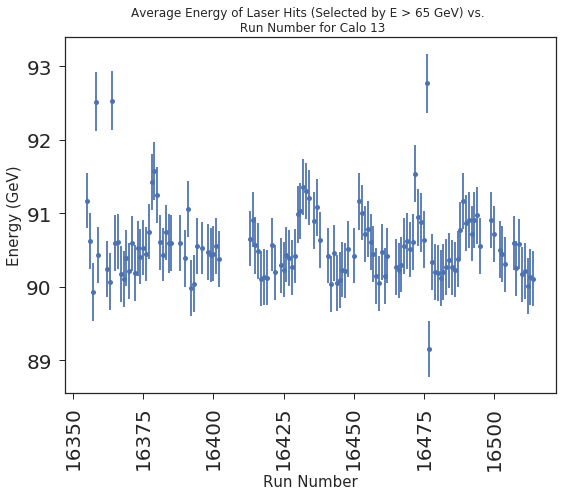

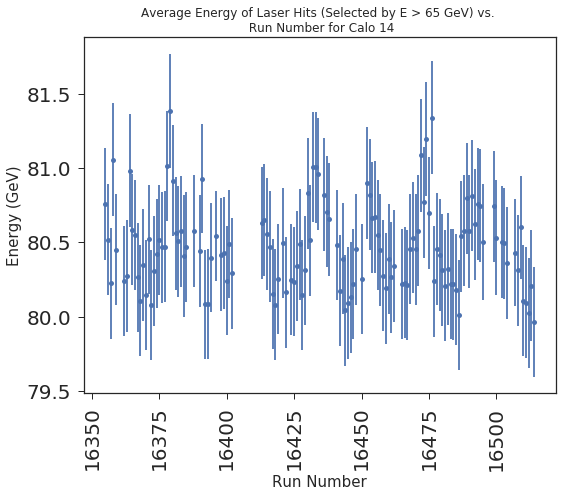

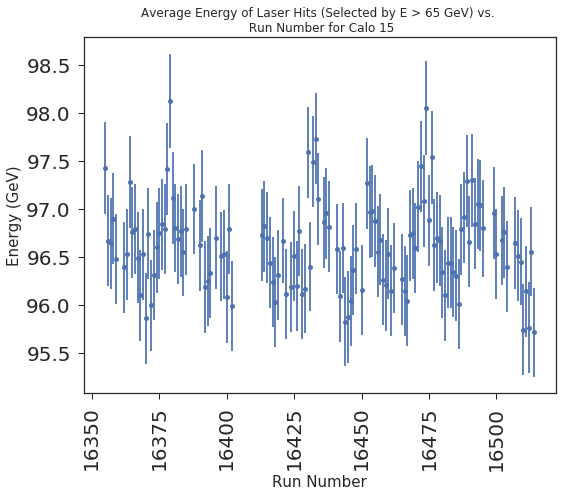

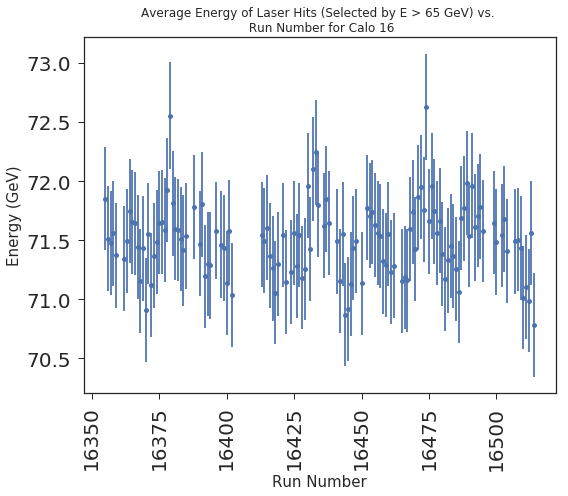

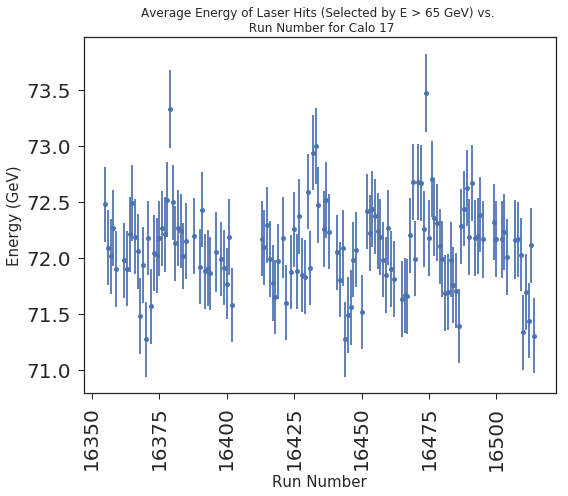

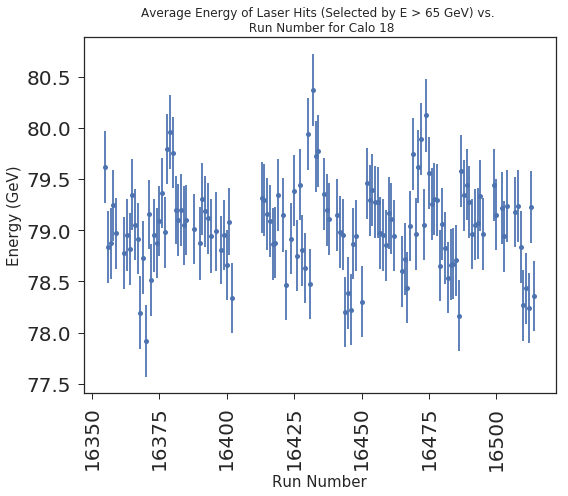

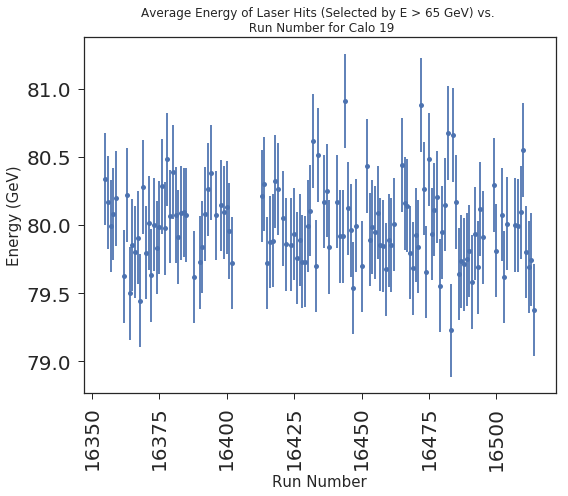

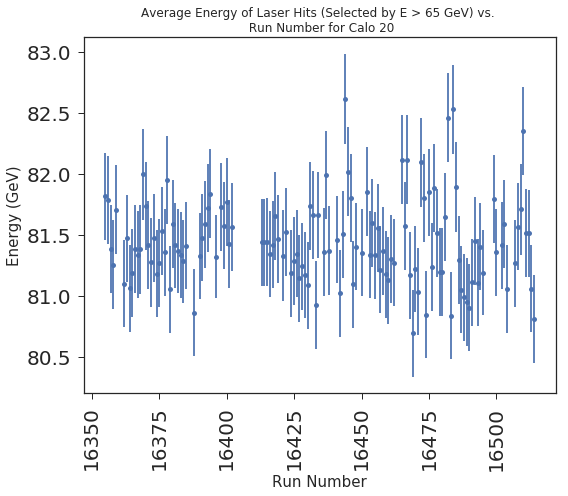

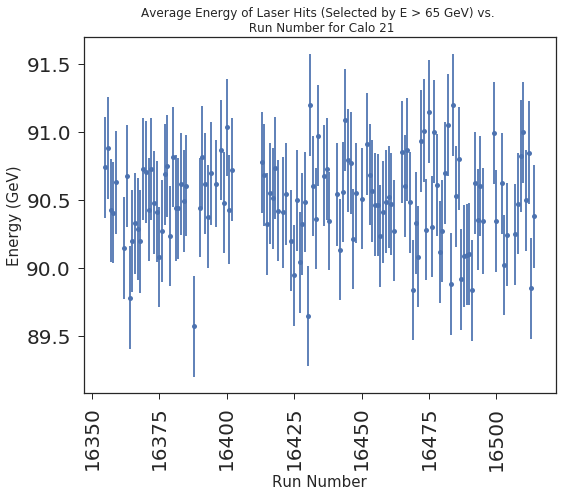

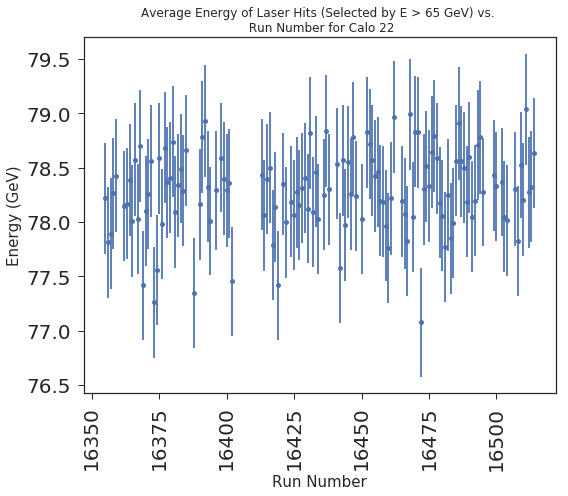

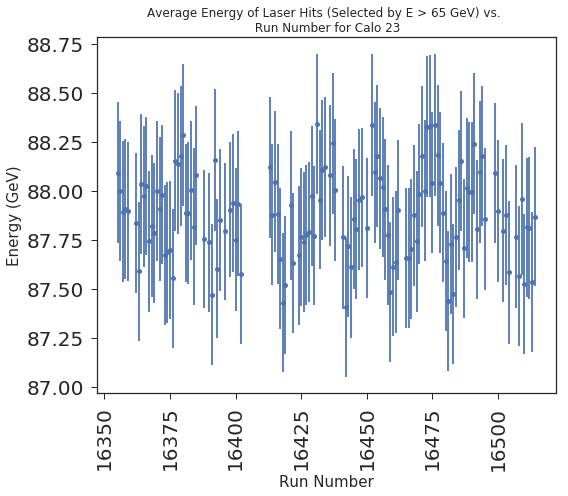

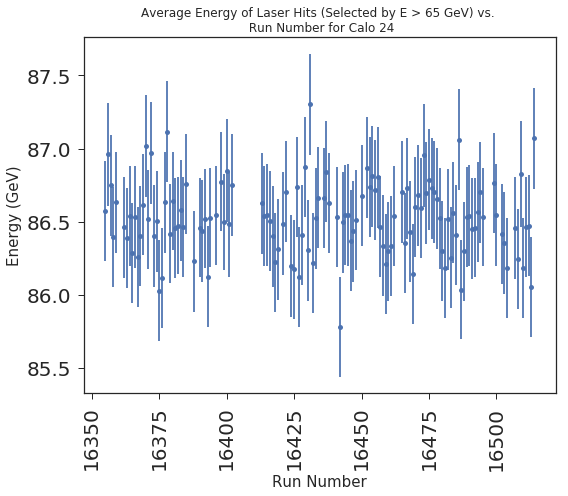

In [38]:
for i,meanVeci in enumerate(meanVec):
    means, runs, calos = zip(*meanVeci)
    stds, runs, calos = zip(*stdVec[i])
    means2 = [x / 1000 for x in means]
#    std2 = [math.sqrt(x) / 1000 for x in stds]
    std2 = [x / 1000 for x in stds]
    fig, ax = plt.subplots(figsize=(8, 7))
#    plt.plot(runs,means2,linestyle='',marker='o',markersize='5')
    plt.errorbar(x=runs,y=means2,xerr=0,yerr=std2,linestyle='',marker='o',markersize='5')
    plt.xlabel("Run Number",size=15)
    plt.ylabel("Energy (GeV)",size=15)
    plt.title("Average Energy of Laser Hits (Selected by E > 65 GeV) vs. \n Run Number for Calo "+str(i+1))
#    plt.ylim(65,120)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig("./images/LaserVsRunNum/LaserVsRunNum_calo_gaussian_timeCut_"+str(i+1).zfill(2)+".png")
    plt.show()

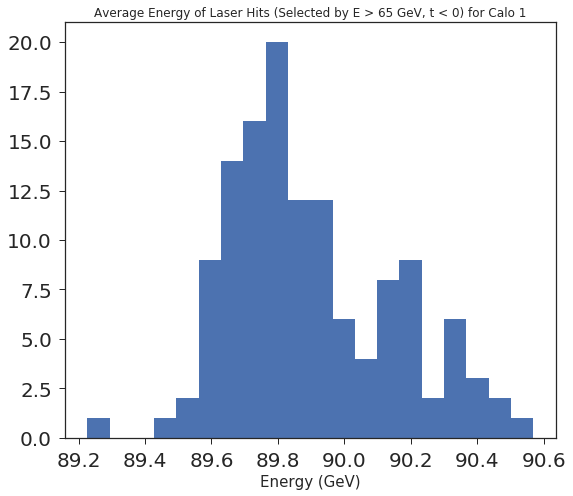

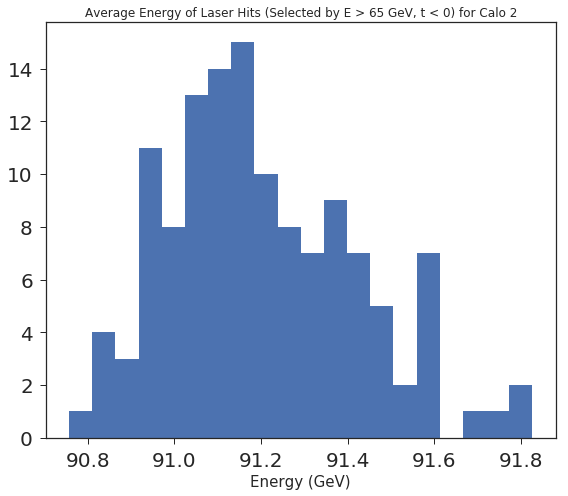

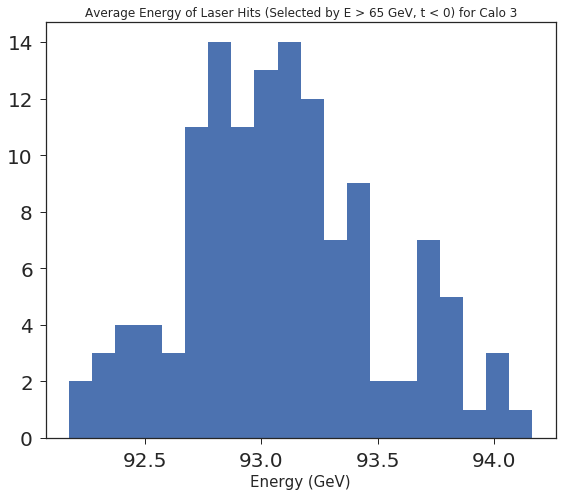

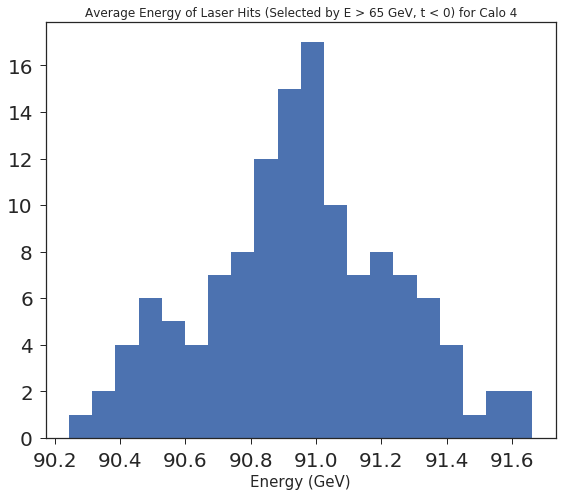

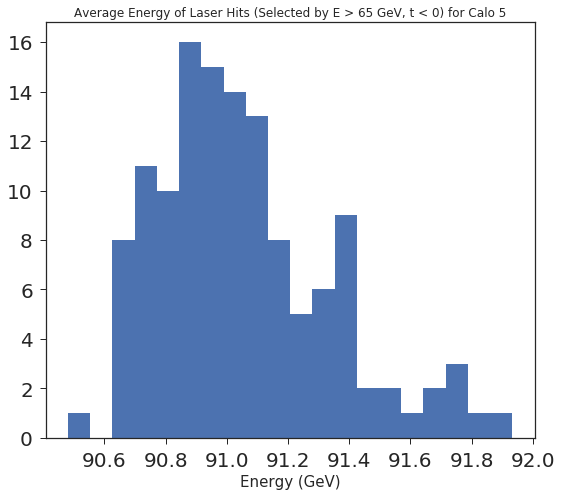

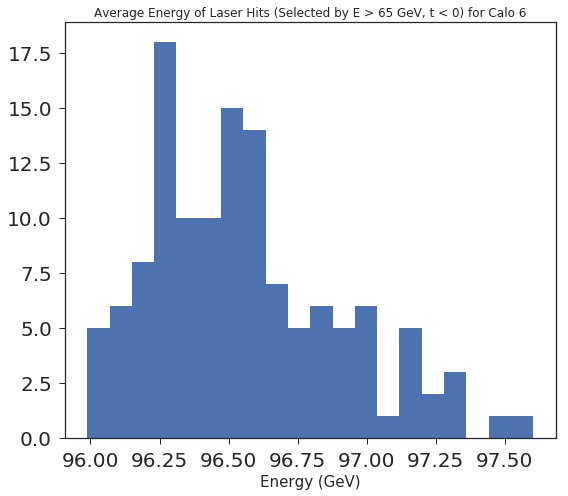

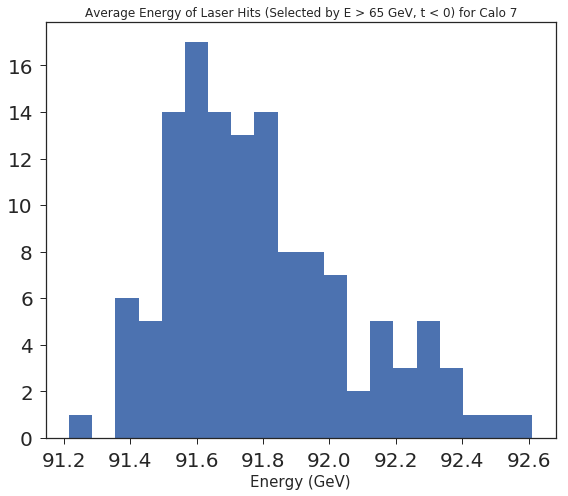

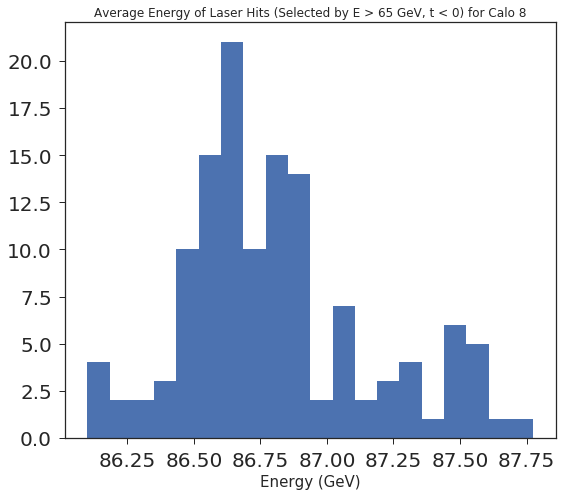

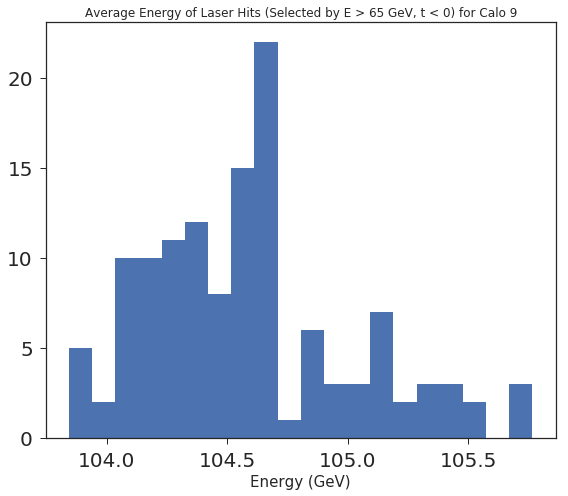

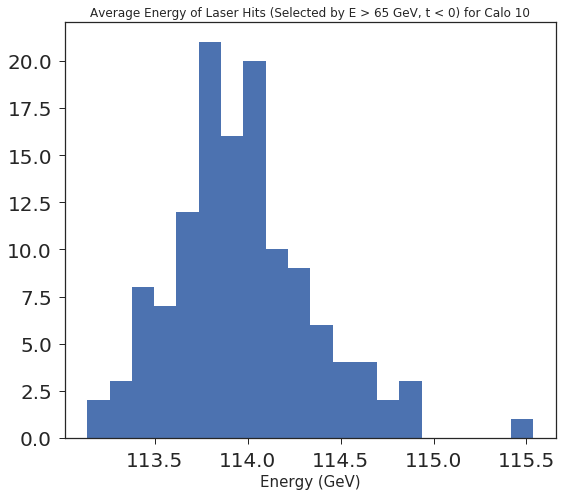

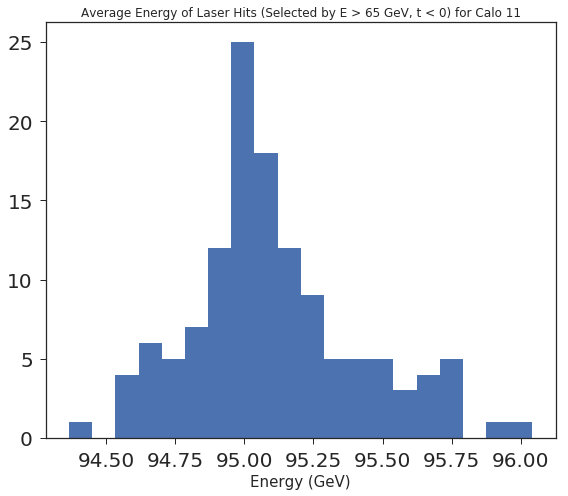

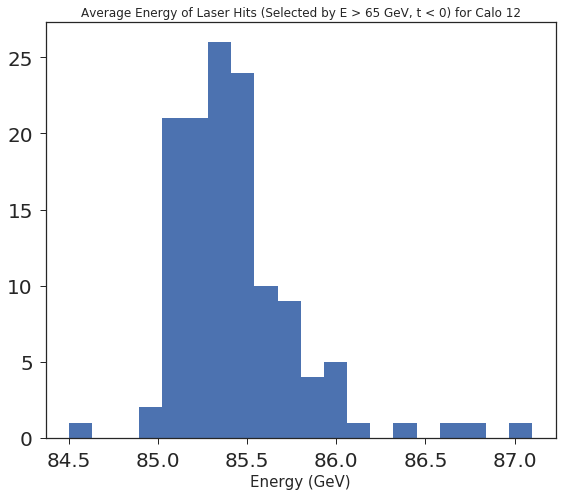

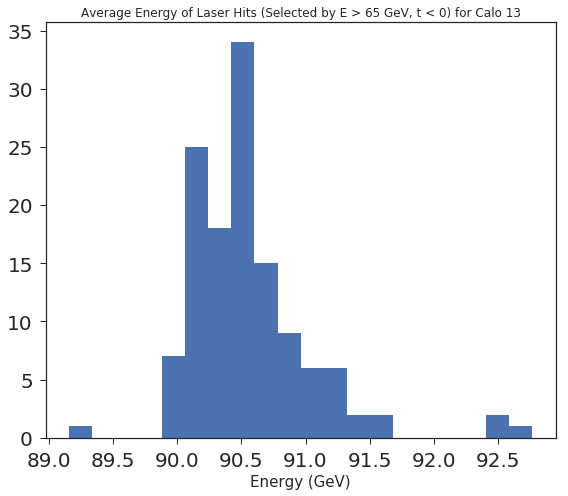

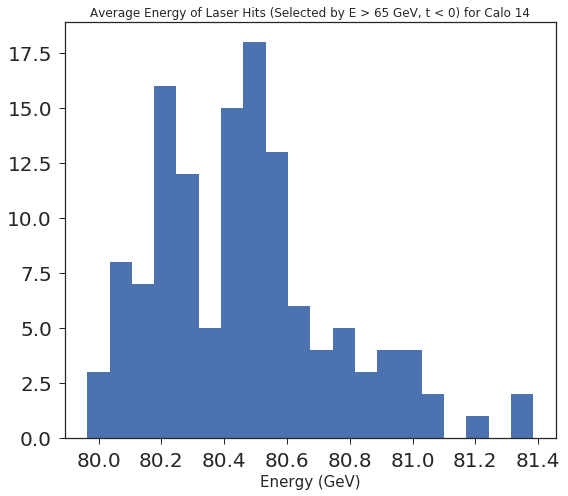

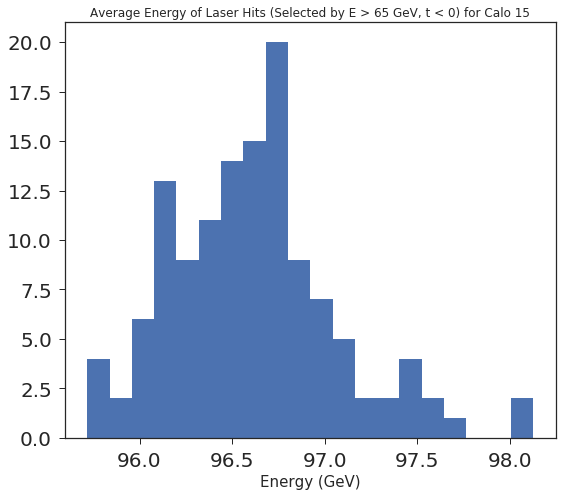

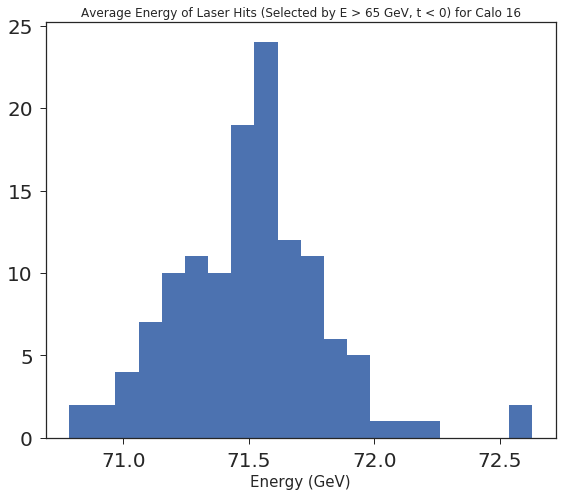

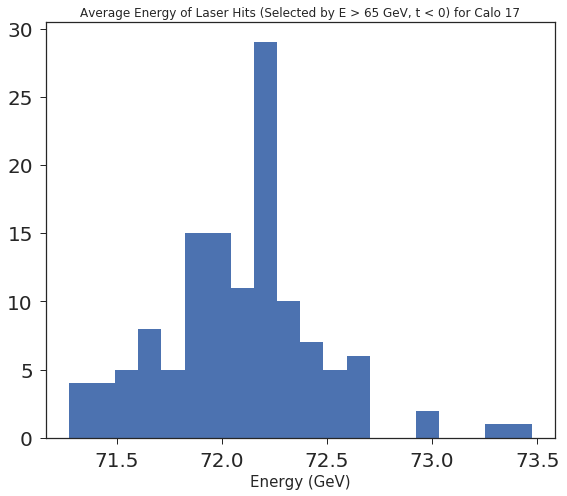

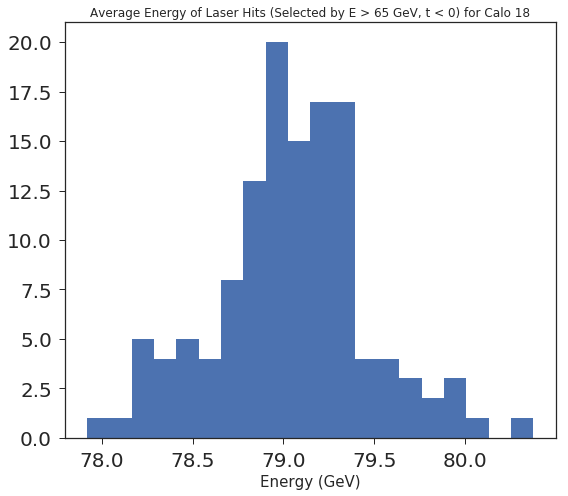

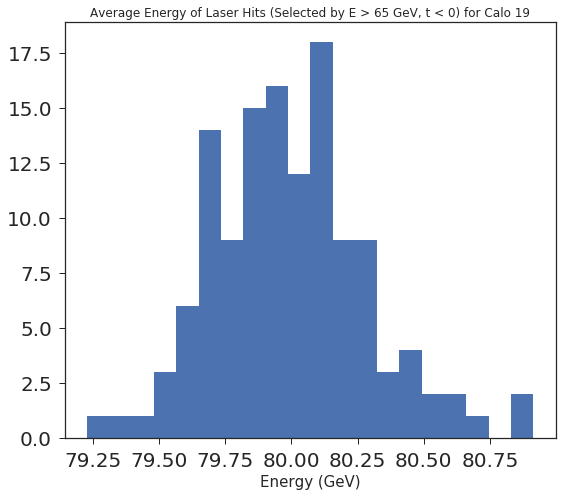

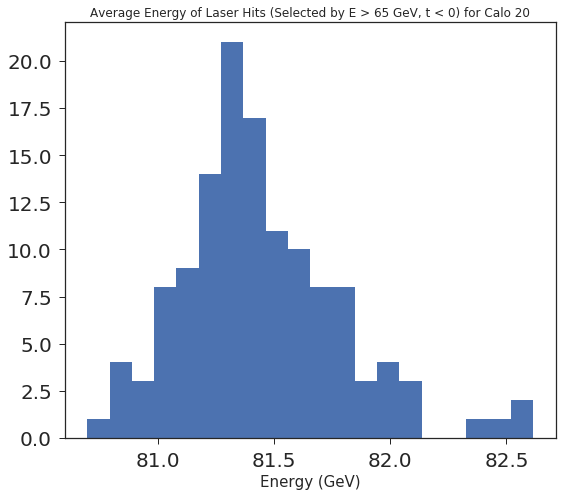

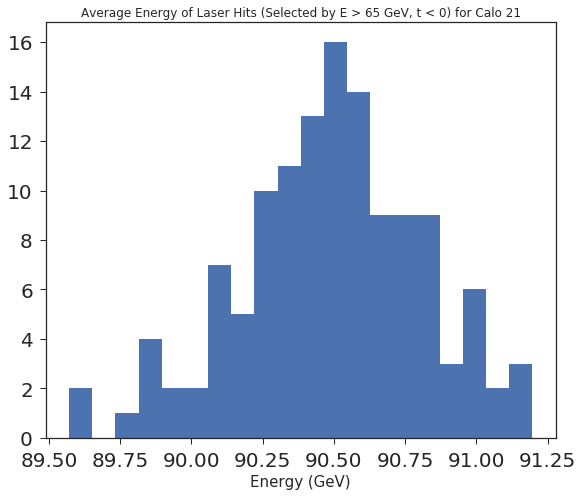

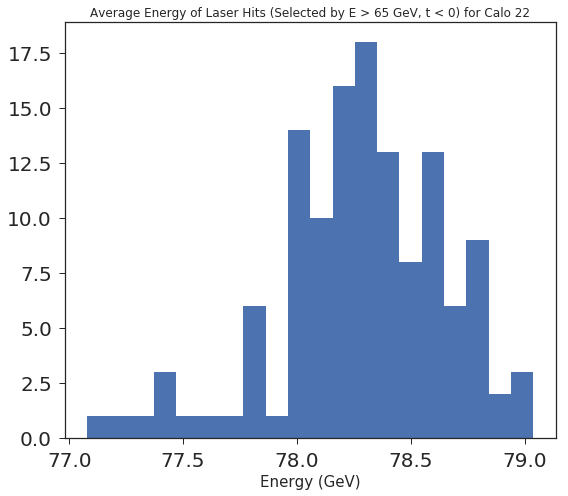

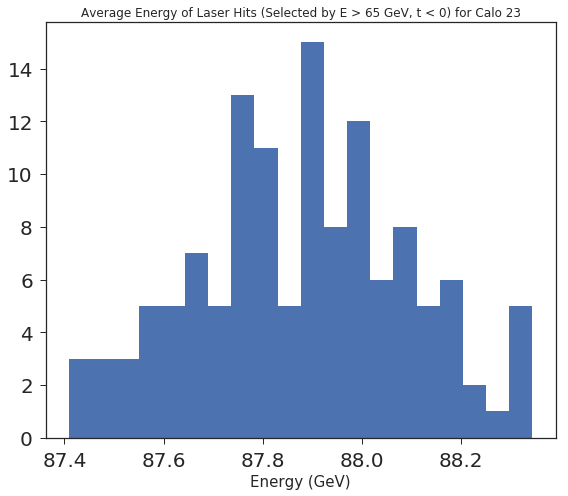

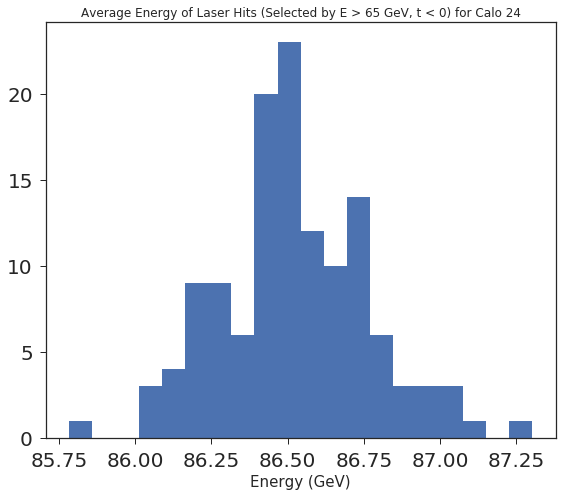

In [45]:
for i,meanVeci in enumerate(meanVec):
    means, runs, calos = zip(*meanVeci)
    stds, runs, calos = zip(*stdVec[i])
    means2 = [x / 1000 for x in means]
#    std2 = [math.sqrt(x) / 1000 for x in stds]
    std2 = [x / 1000 for x in stds]
    fig, ax = plt.subplots(figsize=(8, 7))
#    plt.plot(runs,means2,linestyle='',marker='o',markersize='5')
    plt.hist(means2,bins=20)
    plt.xlabel("Energy (GeV)",size=15)
    plt.title("Average Energy of Laser Hits (Selected by E > 65 GeV, t < 0) for Calo "+str(i+1))
#    plt.ylim(65,120)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig("./images/LaserVsRunNum/Laser_calo_gaussian_timeCut_hist_"+str(i+1).zfill(2)+".png")
    plt.show()

In [20]:
laserDataByCalo = laserDataByCalo2
laserDataByCalo = laserDataByCalo.drop_duplicates(subset=['RunNum','caloNum'])

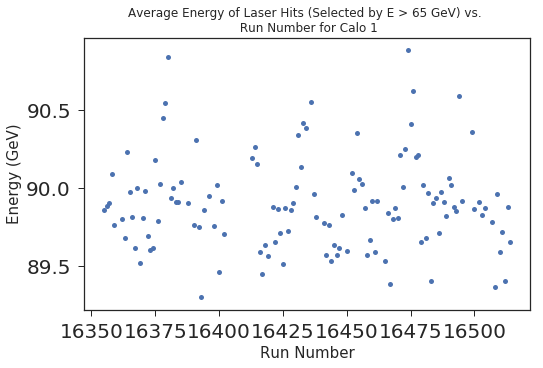

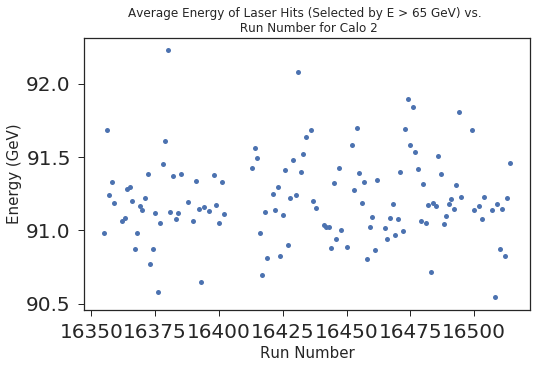

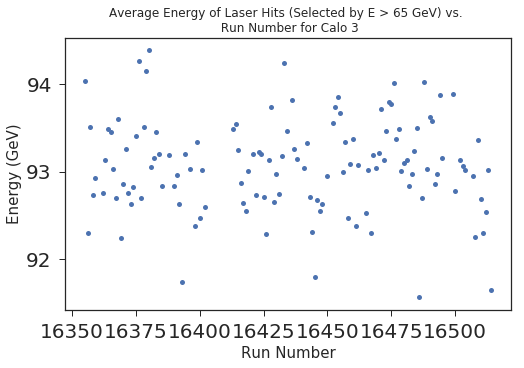

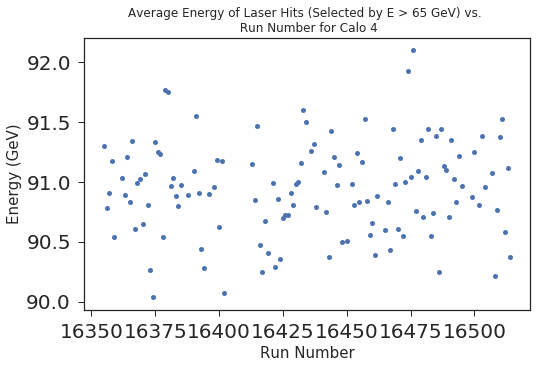

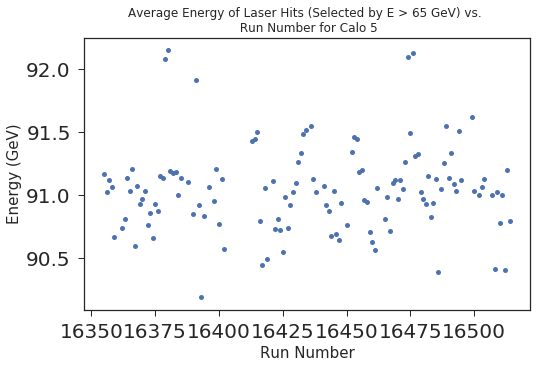

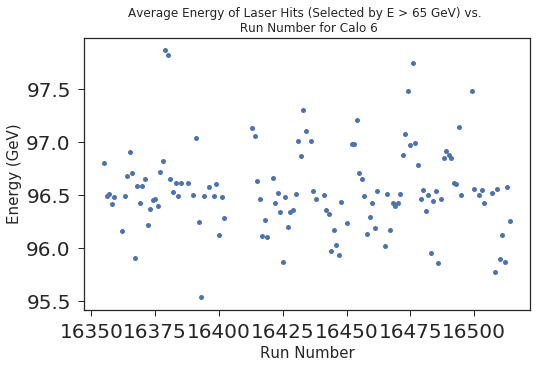

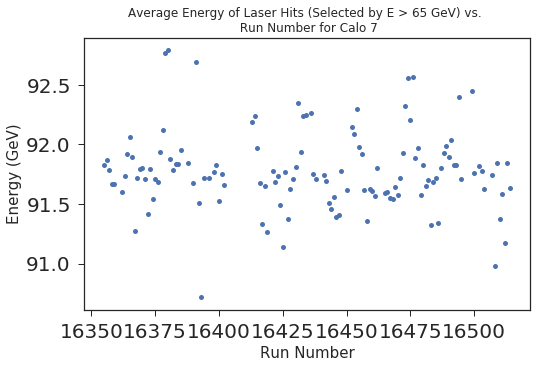

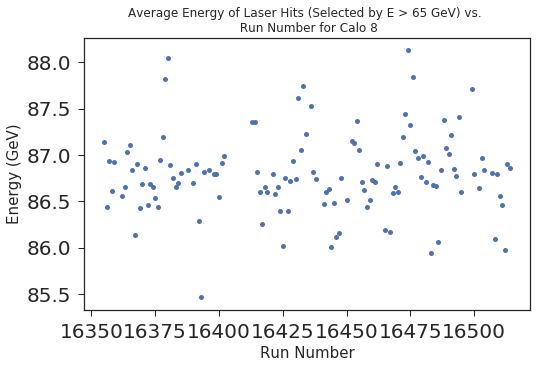

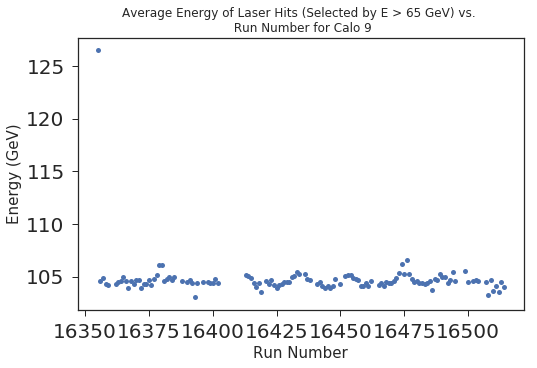

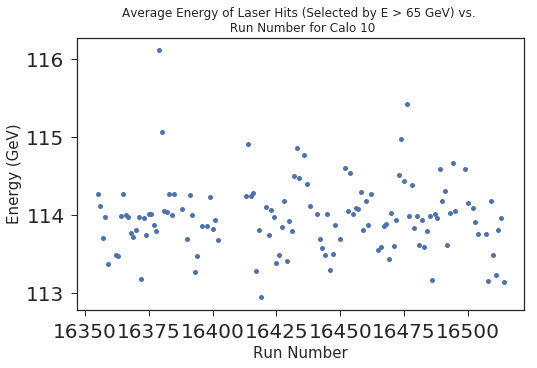

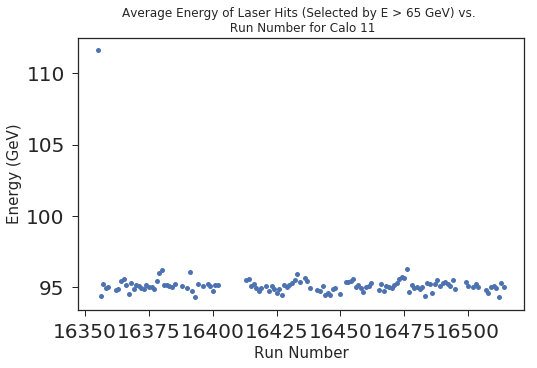

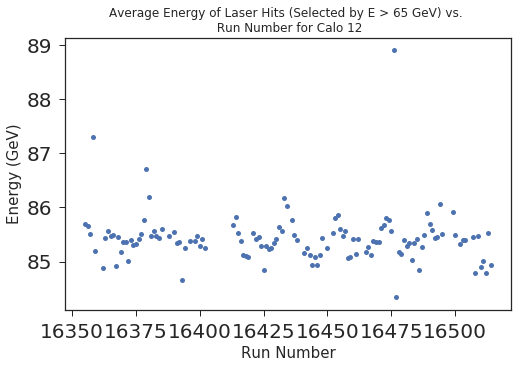

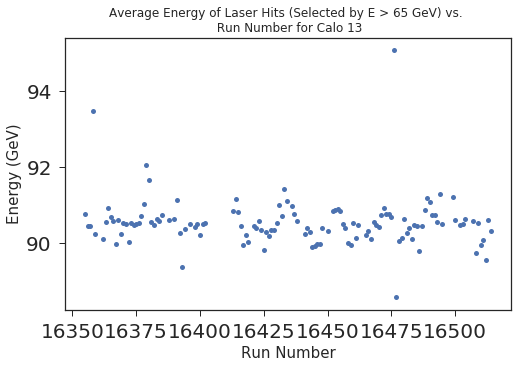

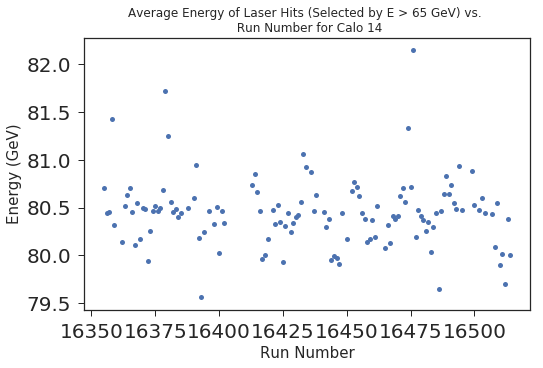

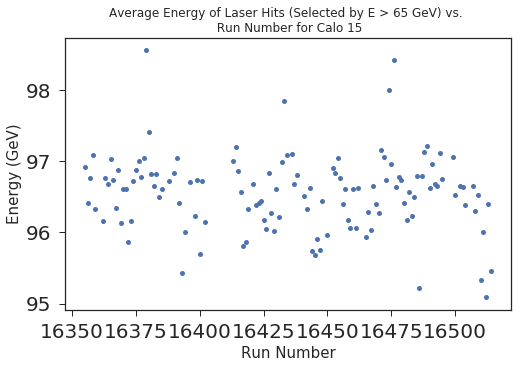

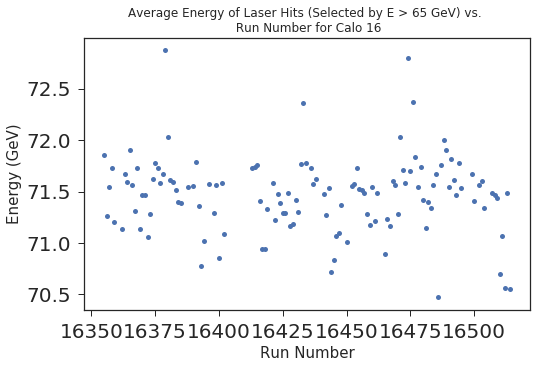

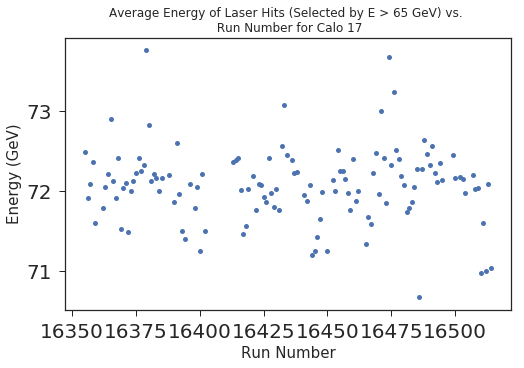

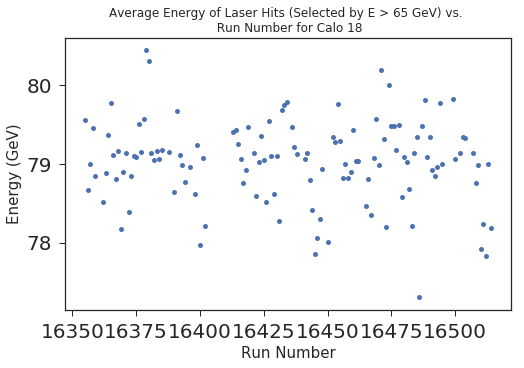

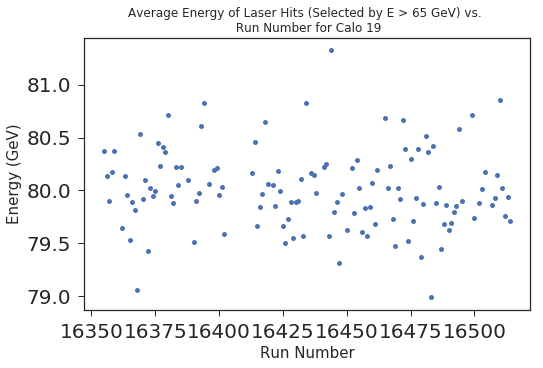

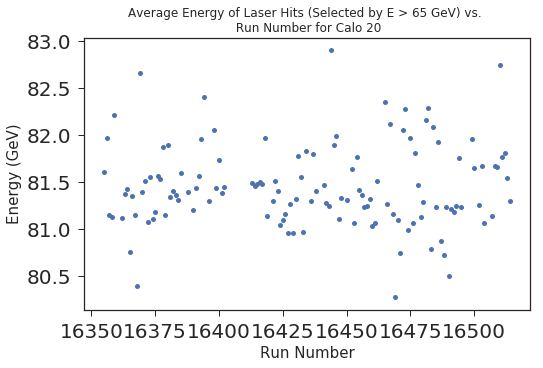

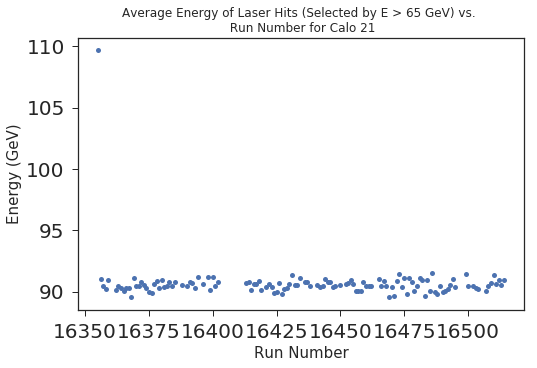

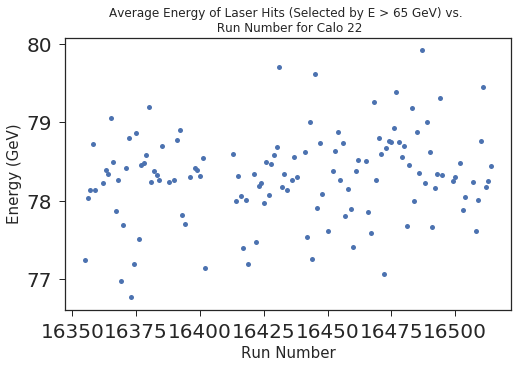

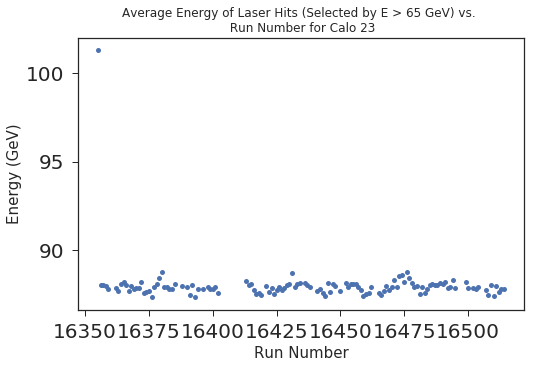

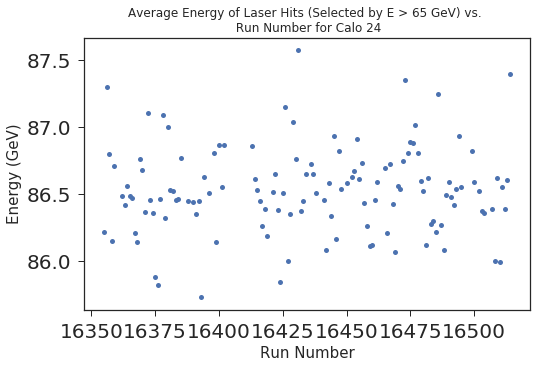

In [21]:
for calo in range(1,25):
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.plot(laserDataByCalo['RunNum'].loc[laserDataByCalo['caloNum'] == calo],(laserDataByCalo['AverageEnergy'].loc[laserDataByCalo['caloNum'] == calo])/1000,linestyle='',marker='o',markersize='5')
    plt.xlabel("Run Number",size=15)
    plt.ylabel("Energy (GeV)",size=15)
    plt.title("Average Energy of Laser Hits (Selected by E > 65 GeV) vs. \n Run Number for Calo "+str(calo))
#    plt.ylim(65,120)
#    plt.savefig("./images/LaserVsRunNum/LaserVsRunNum_calo"+str(calo).zfill(2)+".png")
    plt.show()

In [ ]:
laserDataByCalo = pandas.DataFrame(columns=['AverageEnergy','RunNum','totalEntries','caloNum'])

print(len(laserDataByCalo2.index), "Rows Total")
length = len(laserDataByCalo2.index)
for i in range(length):
    for calo in range(1,25):
        if(laserDataByCalo2['caloNum'].iloc[i] == calo):
            if (i % 100 == 0):
                print("    ",i,"Rows Processed")
            runNumi = laserDataByCalo2['RunNum'].iloc[i]
            dupCount = laserDataByCalo2['totalEntries'].iloc[i]
            weightedE = laserDataByCalo2['AverageEnergy'].iloc[i]*laserDataByCalo2['totalEntries'].iloc[i]
            for j in range(length):
                runNumj = laserDataByCalo2['RunNum'].iloc[j]
                if(runNumj == runNumi and laserDataByCalo2['caloNum'].iloc[j] == calo):
                    weightedE = weightedE + laserDataByCalo2['AverageEnergy'].iloc[j]*laserDataByCalo2['totalEntries'].iloc[j]
                    dupCount = dupCount + laserDataByCalo2['totalEntries'].iloc[j]
            trueE = weightedE / dupCount
            ding = pandas.DataFrame([[trueE,runNumi,dupCount,calo]],columns=['AverageEnergy','RunNum','totalEntries','caloNum'])
            laserDataByCalo = laserDataByCalo.append(ding,ignore_index=True)
    
laserDataByCalo = laserDataByCalo.drop_duplicates(subset='RunNum')

695798 Rows Total
     0 Rows Processed
